# Exercise 5: Regularized Linear Regression and Bias v.s. Variance

## 1 Regularized Linear Regression

## 1.1 Visualizing the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display
from scipy.special import expit #Vectorized sigmoid function
from PIL import Image
from scipy import optimize
import itertools

In [2]:
data = scipy.io.loadmat('data/ex5data1.mat')
X, y = data['X'], data['y']
Xval, yval = data['Xval'], data['yval']
Xtest, ytest = data['Xtest'], data['ytest']

X = np.insert(X, 0, 1, axis=1)
Xval = np.insert(Xval, 0, 1, axis=1)
Xtest = np.insert(Xtest, 0, 1, axis=1)

print('X.shape: ', X.shape)
print('y.shape: ', y.shape)
print('Xval.shape: ', Xval.shape)
print('yval.shape: ', yval.shape)
print('Xtest.shape: ', Xtest.shape)
print('ytest.shape: ', ytest.shape)

X.shape:  (12, 2)
y.shape:  (12, 1)
Xval.shape:  (21, 2)
yval.shape:  (21, 1)
Xtest.shape:  (21, 2)
ytest.shape:  (21, 1)


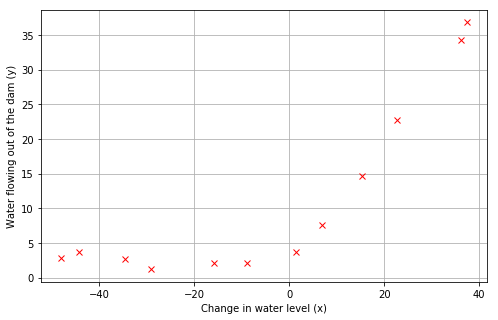

In [3]:
def plotData():
    plt.figure(figsize=(8, 5))
    plt.ylabel('Water flowing out of the dam (y)')
    plt.xlabel('Change in water level (x)')
    plt.plot(X[:,1], y, 'rx')
    plt.grid(True)
    
plotData()

## 1.2 Regularized linear regression cost function

In [4]:
def h(theta, X):
    return np.dot(X, theta)

def linearRegCostFunction(theta, *args):
    X, y, lamb = args
    theta = theta.reshape(-1, 1)
    m = X.shape[0]
    h_y = h(theta, X) - y
    return 1./(2*m)*np.sum(h_y**2) + float(lamb)/(2*m)*np.sum(theta[1:]**2)

In [5]:
# using theta initialized at [1; 1]. You should expect to see an output of 303.993.(with lambda=1)
print(linearRegCostFunction(np.ones([X.shape[1], 1]), X, y, 1.))

303.99319222


## 1.3 Regularized linear regression gradient

In [6]:
def computeGradient(theta, X, y, lamb=0.):
    theta = theta.reshape(-1, 1)
    m = X.shape[0]
    h_y = h(theta, X) - y
    theta_1 = theta[1:]
    grad = 1./m*np.dot(X.T, h_y)
    grad[1:] += lamb/m*theta_1
    return grad

# 最优算法使用的梯度必须是一维横向数组
def computeGradientFlattened(theta, X, y, lamb=0.):
    grad = computeGradient(theta, X, y, lamb)
    return grad.ravel()

In [7]:
# using theta initialized at [1; 1]. You should expect to see a gradient of [-15.30; 598.250].(with lambda=1)
print(computeGradient(np.ones([X.shape[1], 1]), X, y, 1.))

[[ -15.30301567]
 [ 598.25074417]]


## 1.4 Fitting linear regression

In [8]:
def optimizeTheta(initial_theta, X, y, lamb=0.):
    optimize_theta = scipy.optimize.fmin_cg(linearRegCostFunction, x0=initial_theta,\
                                       fprime=computeGradientFlattened,\
                                       args=(X, y, lamb),\
                                       disp=False)
    return optimize_theta.reshape(initial_theta.shape[0], 1)

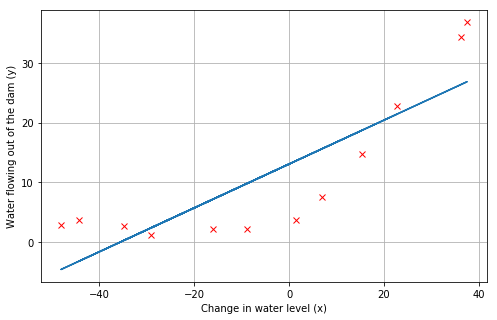

In [9]:
# 最优算法使用的theta必须是一维横向数组
initial_theta = np.ones([X.shape[1], 1]).ravel()
optimize_theta = optimizeTheta(initial_theta, X, y, 1)

plotData()
plt.plot(X[:,1], h(optimize_theta, X).flatten())
plt.show()